# TWITTER AIRLINE SENTIMENTS USING NATURAL LANGUAGE PROCESSING

## CS 6120 - Natural Language Processing

### Group 5
- Uma Mahesh Avalapati
- Siddhant Dube

This jupyter notebook consists of all the code and implementations performed to understand the sentimental values of twitter users who travel via flights. Each code section has been labelled appropriately.

## Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import nltk
import re 
import os 
import random 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import model_selection, naive_bayes, svm

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
from wordcloud import WordCloud,STOPWORDS
import math
from typing import List
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
nltk.download('omw-1.4')
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/siddhantdube/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siddhantdube/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/siddhantdube/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/siddhantdube/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

## Necessary Global Functions

Below are all the important functions which will be used throughout the code implementation.

In [2]:
def delete_columns(
    data_frame: pd.DataFrame,
    columns_list: List
    ) -> pd.DataFrame:
    """This function takes a list of columns to delete from the given dataframe
    
    Args:
        data_frame (pd.DataFrame): The dataframe from which the columns are taken out from
        columns_list (List): The columns which need to be removed
        
    Returns:
        updated_data_frame (pd.DataFrame): The dataframe after the columns have been removed
    """
    try:
        updated_data_frame = data_frame.drop(columns_list, axis = 1)
    except KeyError:
        print("The respective columns have already been deleted")
        updated_data_frame = data_frame
        
    return updated_data_frame
        

## Performing Data Analysis

In [3]:
# Importing the dataset as a dataframe

airline_df = pd.read_csv('Tweets.csv')

Let's take a look at the first 5 rows of the dataset

In [4]:
airline_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
# Information related to all the features in the dataset

airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

Now, we look into the shape of the dataframe, and find the number of null values present for each feature in the dataset. This will allow us to identify inconclusive features.

In [6]:
print("The shape of the dataset: ", airline_df.shape)
print("\nThe number of NULL values in each column: \n")
print(airline_df.isna().sum())

The shape of the dataset:  (14640, 15)

The number of NULL values in each column: 

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [7]:
print("The percentage of the number of NULL values in each column: ")
((airline_df.isnull() | airline_df.isna()).sum() / airline_df.index.size * 100).round(3)

The percentage of the number of NULL values in each column: 


tweet_id                         0.000
airline_sentiment                0.000
airline_sentiment_confidence     0.000
negativereason                  37.309
negativereason_confidence       28.128
airline                          0.000
airline_sentiment_gold          99.727
name                             0.000
negativereason_gold             99.781
retweet_count                    0.000
text                             0.000
tweet_coord                     93.040
tweet_created                    0.000
tweet_location                  32.329
user_timezone                   32.923
dtype: float64

It can be seen that 3 columns in this dataset have an exceptionally high amount of NULL values, so they will not provide any value to the model traning in the further steps. Therefore, we will get rid of the columns:
- airline_sentiment_gold
- negativereason_gold
- tweet_coord

In [8]:
# First of all let's drop the columns which we don't required
columns_list = ['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord']
airline_df = delete_columns(data_frame=airline_df, columns_list=columns_list)

airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.3+ MB


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

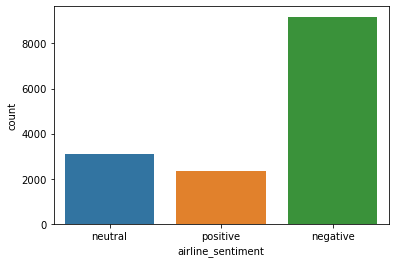

In [9]:
# Let us look into the variations in the sentiments

sns.countplot(x = "airline_sentiment", data = airline_df)

> There are a lot more negative reviews compared to the other two categories.

> Positive reviews are the least in terms of numbers, suggesting that passengers incline more towards dissatisfaction from the airlines.

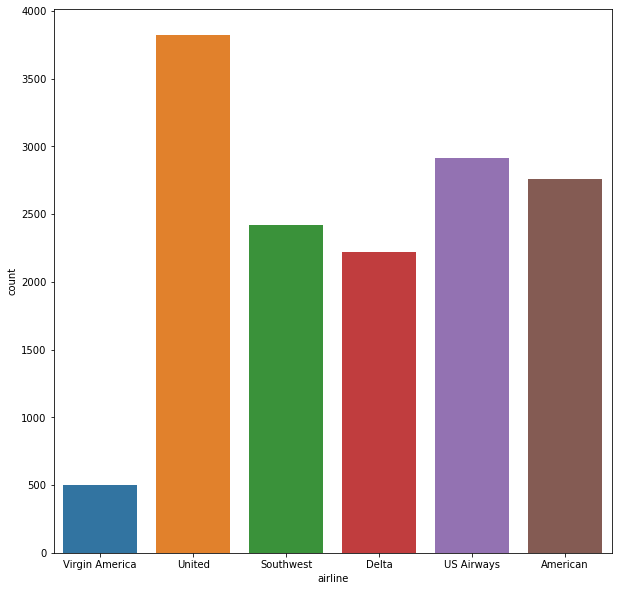

In [10]:
# Number of tweets per Airline (we can understand the more popular airlines from this following plot)
plt.figure(figsize=(10,10))
ax = sns.countplot(x="airline", data=airline_df)

> United has the most number of flights.

> Virgin America has the least number of flights.

###  Looking into the Sentiment Distributions for each Airline

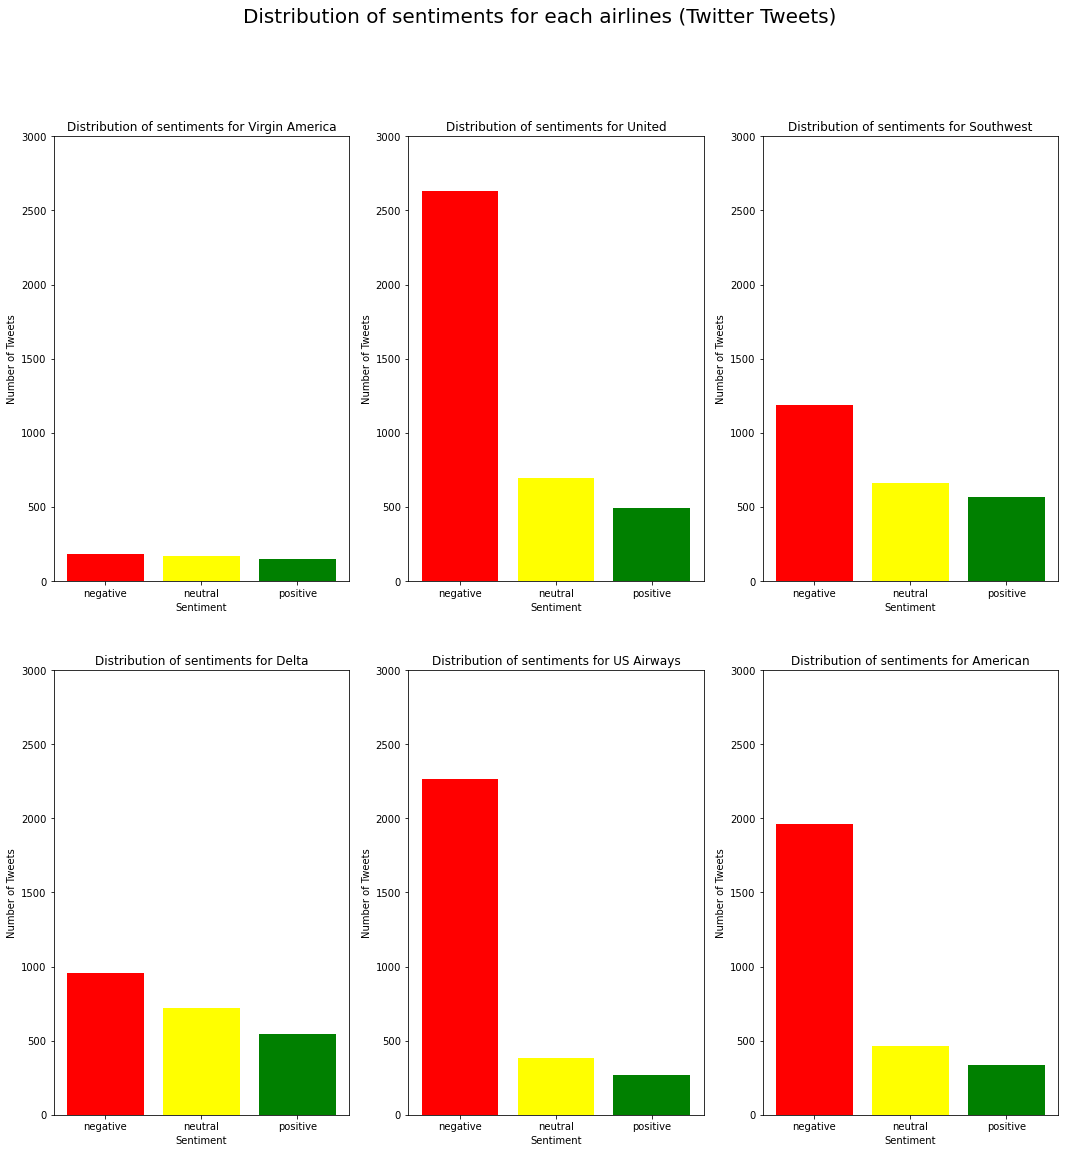

In [11]:
airlines= ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American']
fig = plt.figure(1,figsize=(18, 18))
fig.suptitle("Distribution of sentiments for each airlines (Twitter Tweets)", fontsize=20)
for idx in range(len(airlines)):
    plt.subplot(2, 3, idx+1)
    airline_name = airlines[idx]
    updated_airline_df = airline_df[airline_df['airline'] == airline_name]
    value_counts = updated_airline_df['airline_sentiment'].value_counts()
    plt.ylim(top=3000) 
    plt.ylim(bottom=0) 
    plt.bar([1, 2, 3], value_counts, color=['red', 'yellow', 'green'])
    plt.xticks([1, 2, 3],['negative','neutral','positive'])
    plt.ylabel('Number of Tweets')
    plt.xlabel('Sentiment')
    title_string = 'Distribution of sentiments for ' + airline_name
    plt.title(title_string)

> United Airways, US Airways, and American Airlines have a most number of negative sentiments in proportion to the total tweets.

> Virgin America has the most balanced sentiment reviews, but also the least number of tweets.

> None of the Airlines have more neutral or positive tweets comapred to the negative tweets. 

### Generating Word Clouds for each Sentiment

In [12]:
def generate_wordcloud(data_frame, sentiment):

    sentiment_df = data_frame[data_frame['airline_sentiment'] == sentiment]
    words = ' '.join(sentiment_df['text'])
    words_list = words.split()
    clean_text = " ".join([clean_word(word) for word in words_list])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=2500
                         ).generate(clean_text)
    
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [13]:
def clean_word(word):
    if 'http' not in word or not word.startswith('@') or word != 'RT' or 'https' not in word:
        return word
    else:
        return ''

We look into the word cloud for all the negative tweets, the results will show the most used words in negative categorized tweets.

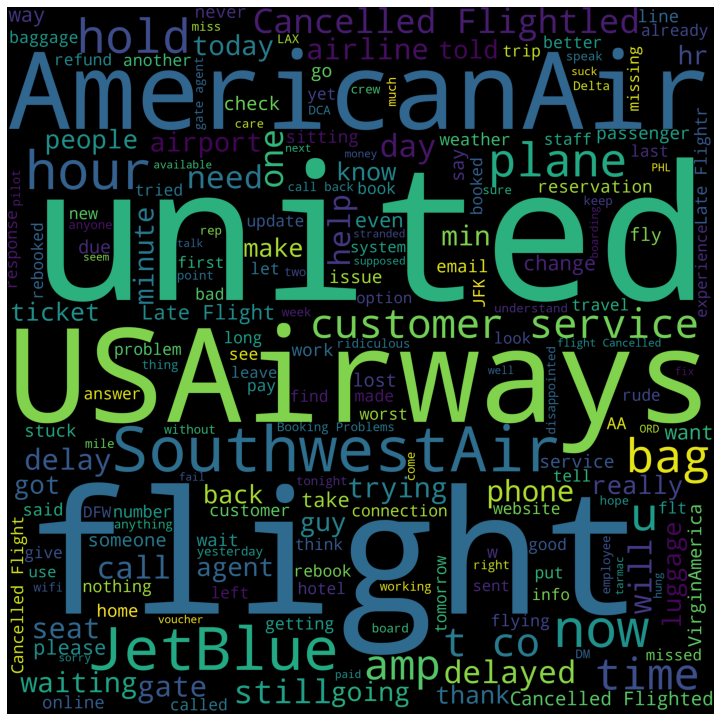

In [14]:
generate_wordcloud(data_frame=airline_df, sentiment='negative')

> We can see that united has been used the most number of times. Also, words such as bag and hold suggest the delays faced by the passengers to arrive at a negative conclusion.

We look into the word cloud for all the negative tweets, the results will show the most used words in negative categorized tweets.

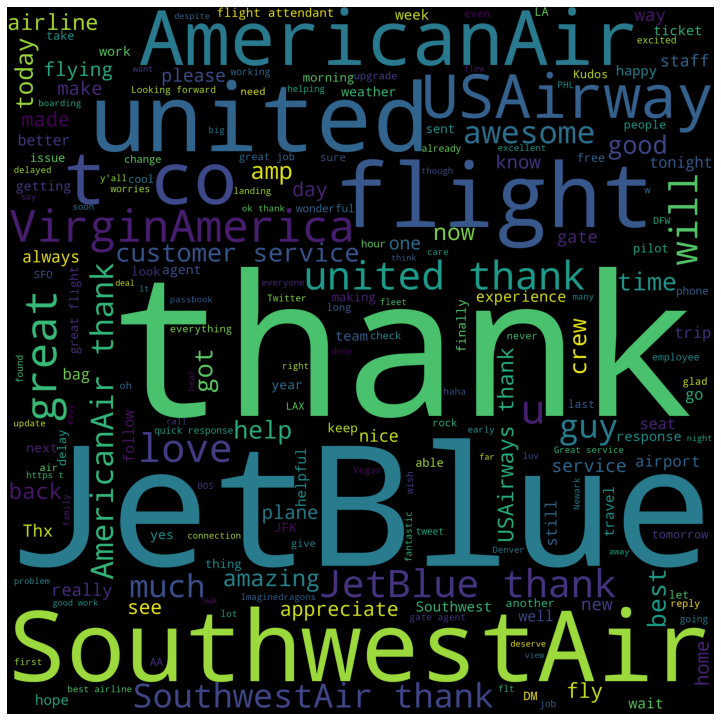

In [15]:
generate_wordcloud(data_frame=airline_df, sentiment='positive')

> We can see that JetBlue and Southwest Airlines been used the most number of times, also the airline JetBlue was not one of the categories so this inclusion could suggest comparions to this airline. Also southwest seems to have a better ratio for the negative to positive tweets.

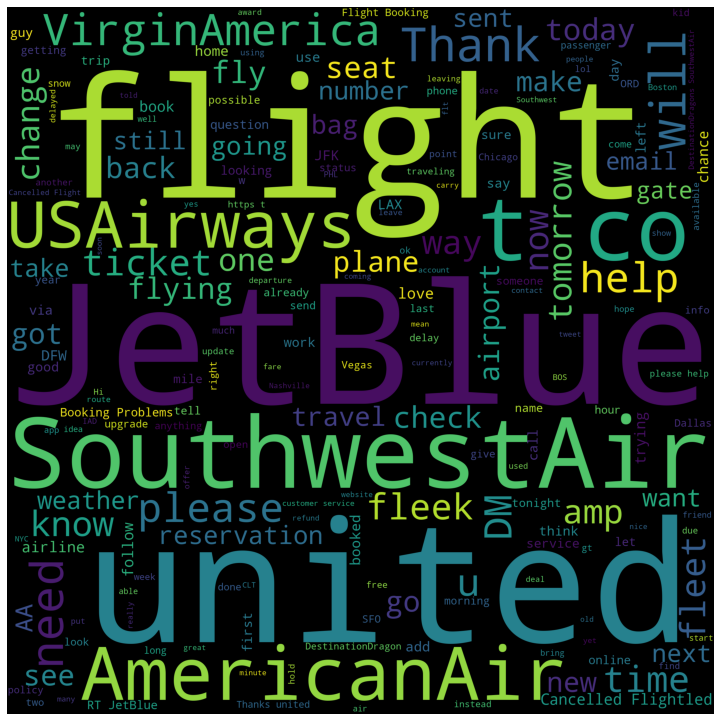

In [16]:
generate_wordcloud(data_frame=airline_df, sentiment='neutral')

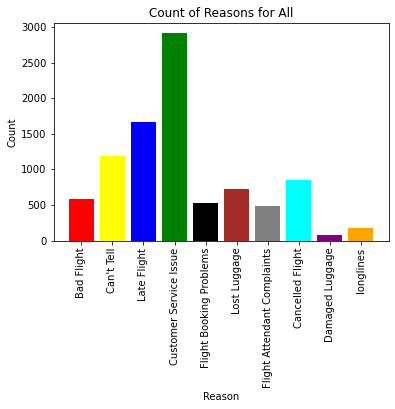

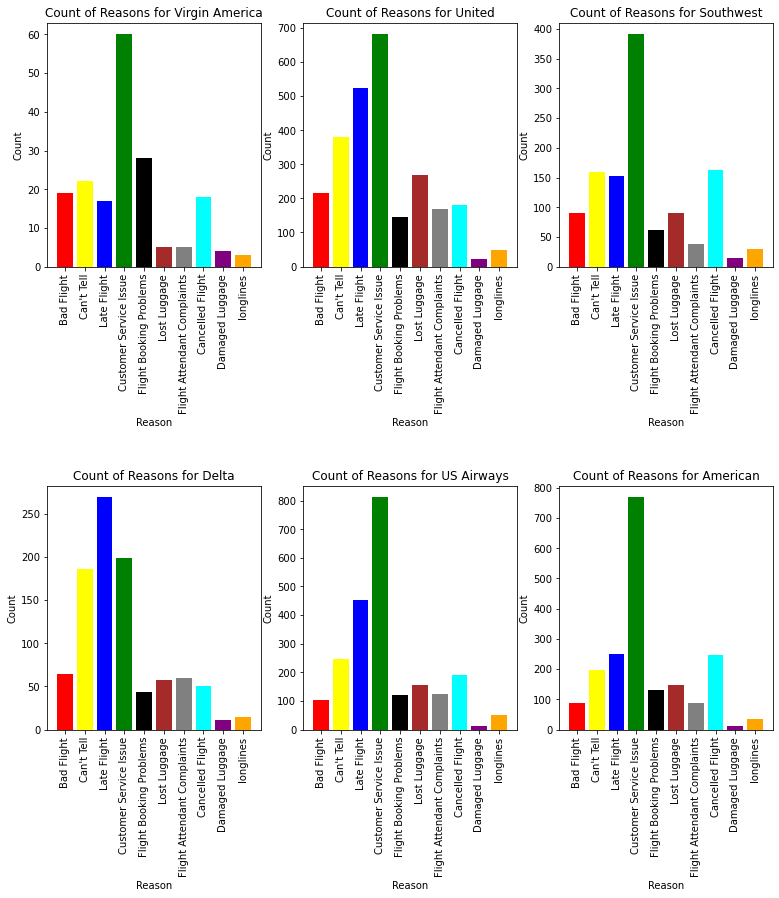

In [17]:
#get the number of negative reasons
airline_df['negativereason'].nunique()

NR_Count = dict(airline_df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=airline_df
    else:
        a=airline_df[airline_df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(airline_df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)


In [18]:
date = airline_df.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

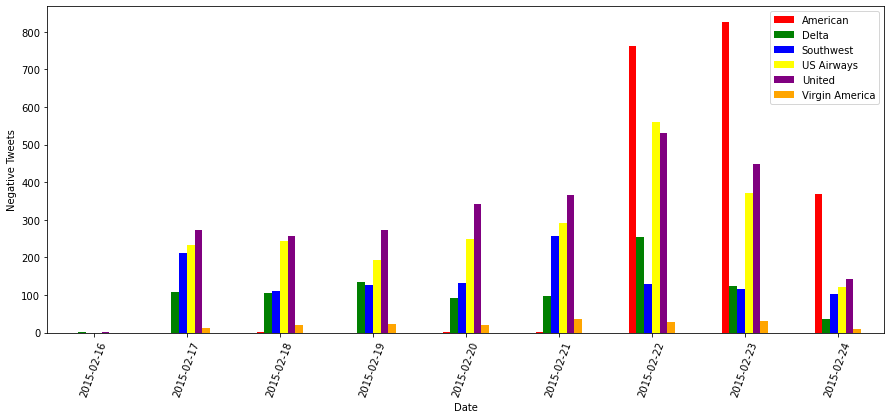

In [19]:
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

## Preprocessing 

In [20]:
# First of all let's drop the columns which we will not be using much from here

columns_list = ['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'name', 'retweet_count', 'tweet_created',
       'tweet_location', 'user_timezone']

airline_df = delete_columns(data_frame=airline_df, columns_list=columns_list)

In [21]:
airline_df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [22]:


stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
    """ Referenced from Assignment 2
    """
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

In [23]:
for index, row in airline_df.iterrows():
    airline_df.at[index, 'text'] = clean_text(airline_df.at[index, 'text'])

In [24]:
# splitting dataframe by row index
split_ratio = math.floor(0.8*len(airline_df))
training_df = airline_df.iloc[:split_ratio,:]
testing_df = airline_df.iloc[split_ratio:,:]

In [25]:
training_df.shape, testing_df.shape

((11712, 2), (2928, 2))

## USING A COUNT VECTORIZER AND THE TF-IDF VECTORIZER ON THE DATA

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [27]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(training_df['text'], training_df['airline_sentiment'])
X_train_count_vec = count_vectorizer.transform(training_df['text']).toarray()
y_train_count_vec = count_vectorizer.transform(training_df['airline_sentiment']).toarray()
X_test_count_vec = count_vectorizer.transform(testing_df['text']).toarray()
y_test_count_vec = count_vectorizer.transform(testing_df['airline_sentiment']).toarray()

X_train_count_vec.shape, y_train_count_vec.shape, X_test_count_vec.shape, y_test_count_vec.shape

((11712, 12598), (11712, 12598), (2928, 12598), (2928, 12598))

In [28]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
tfidf_vectorizer.fit(training_df['text'], training_df['airline_sentiment'])
X_train_tfidf_vec = tfidf_vectorizer.transform(training_df['text']).toarray()
y_train_tfidf_vec = tfidf_vectorizer.transform(training_df['airline_sentiment']).toarray()
X_test_tfidf_vec = tfidf_vectorizer.transform(testing_df['text']).toarray()
y_test_tfidf_vec = tfidf_vectorizer.transform(testing_df['airline_sentiment']).toarray()

X_train_tfidf_vec.shape, y_train_tfidf_vec.shape, X_test_tfidf_vec.shape, y_test_tfidf_vec.shape

((11712, 12598), (11712, 12598), (2928, 12598), (2928, 12598))

In [29]:
label_encoder = LabelEncoder()
y_train_le = label_encoder.fit_transform(training_df[['airline_sentiment']])
y_test_le = label_encoder.fit_transform(testing_df[['airline_sentiment']])

y_train_le.shape, y_test_le.shape

/Users/siddhantdube/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


((11712,), (2928,))

In [30]:
hot_encoder = OneHotEncoder()
y_train_he = hot_encoder.fit_transform(training_df[['airline_sentiment']]).toarray()
y_test_he = hot_encoder.fit_transform(testing_df[['airline_sentiment']]).toarray()

y_train_he.shape, y_test_he.shape

((11712, 3), (2928, 3))

## BUILDING A MODEL

In [31]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import Model

tf.random.set_seed(42)
from keras import backend as K

def build_model(X, y):
    # layer 1 : input layer
    inp = tf.keras.Input(shape = (X.shape[1]))

    # layer 2 : add the dense layer with 2048 units and relu activation
    layer2 = Dense(2048, activation= 'relu')(inp)

    # layer 3 : add the dropout layer with dropout rate of 0.5
    layer3 = Dropout(0.5)(layer2)

    # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization
    layer4 = Dense(1024, activation='tanh',kernel_regularizer='l2')(layer3)

    # layer 5 : add the dropout layer with dropout rate of 0.5
    layer5 = Dropout(0.5)(layer4)

    # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization
    layer6 = Dense(512, activation='tanh',kernel_regularizer='l2')(layer5)

    # layer 7 : add the dropout layer with dropout rate of 0.5
    layer7 = Dropout(0.5)(layer6)

    # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization
    layer8  = Dense(256, activation='tanh',kernel_regularizer='l2')(layer7)

    # layer 9 : add the dropout layer with dropout rate of 0.5
    layer9 = Dropout(0.5)(layer8)

    # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization
    layer10 = Dense(128, activation='tanh',kernel_regularizer='l2')(layer9)

    # layer 11 : add the dropout layer with dropout rate of 0.5
    layer11 = Dropout(0.5)(layer10)

    # layer 12 : output layer with units equal to number of classes and activation as softmax
    layer12 = Dense(y.shape[1], activation='softmax')(layer11)

    # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy 
    model = Model(inputs=inp, outputs=layer12)
    model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=[tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'accuracy'])
    
    return model



In [32]:
# Training it using the CountVectorizer and HotEncoder
model_count_vectorizer = build_model(X_train_count_vec, y_train_he)
model_count_vectorizer.summary()
history = model_count_vectorizer.fit(X_train_count_vec, y_train_he, validation_data = (X_test_count_vec, y_test_he), epochs = 10, batch_size = 512)

2022-08-14 23:29:10.613934: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12598)]           0         
                                                                 
 dense (Dense)               (None, 2048)              25802752  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0     

In [33]:
# Training it using the TF-IDF Vectorizer and HotEncoder
model_tfidf_vectorizer = build_model(X_train_tfidf_vec, y_train_he)
history = model_tfidf_vectorizer.fit(X_train_tfidf_vec, y_train_he, validation_data = (X_test_tfidf_vec, y_test_he), epochs = 10, batch_size = 512)

Epoch 1/10
23/23 [==============================] - 14s 515ms/step - loss: 11.7333 - auc_1: 0.7890 - precision_1: 0.7051 - recall_1: 0.4731 - accuracy: 0.6124 - val_loss: 5.1631 - val_auc_1: 0.9065 - val_precision_1: 0.7331 - val_recall_1: 0.7128 - val_accuracy: 0.7189
Epoch 2/10
23/23 [==============================] - 11s 471ms/step - loss: 3.0503 - auc_1: 0.8967 - precision_1: 0.8257 - recall_1: 0.6132 - accuracy: 0.7295 - val_loss: 1.6560 - val_auc_1: 0.9304 - val_precision_1: 0.8667 - val_recall_1: 0.7107 - val_accuracy: 0.7968
Epoch 3/10
23/23 [==============================] - 11s 480ms/step - loss: 1.2341 - auc_1: 0.9283 - precision_1: 0.8548 - recall_1: 0.6602 - accuracy: 0.7762 - val_loss: 0.9382 - val_auc_1: 0.9283 - val_precision_1: 0.8420 - val_recall_1: 0.7319 - val_accuracy: 0.7920
Epoch 4/10
23/23 [==============================] - 11s 496ms/step - loss: 0.7559 - auc_1: 0.9475 - precision_1: 0.8710 - recall_1: 0.7024 - accuracy: 0.8187 - val_loss: 0.7297 - val_auc_1: 0.

### SVM WITH TF-IDF

In [34]:
airline_df = airline_df[airline_df['airline_sentiment'] != 'neutral']
airline_df['sentiment'] = airline_df['airline_sentiment'].apply(lambda x: 1 if x =='positive' else 0)

In [35]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf = tfidf_vectorizer.fit_transform(airline_df.text)
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf, airline_df['sentiment'], random_state=42)

In [36]:
SVM = svm.SVC( probability=True)

SVM_model = SVM.fit(X_train, y_train)
predicted_class = SVM_model.predict(X_test)
predicted_class_train = SVM_model.predict(X_train)
test_probs = SVM_model.predict_proba(X_test)
test_probs = test_probs[:, 1]
yhat = SVM_model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, test_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)


train_accuracy = accuracy_score(y_train, predicted_class_train)
test_accuracy = accuracy_score(y_test, predicted_class)

train_auc = roc_auc_score(y_train, SVM_model.predict_proba(X_train)[:,1])
test_auc = roc_auc_score(y_test, SVM_model.predict_proba(X_test)[:,1])

In [37]:
print(train_accuracy)
print(test_accuracy)
print(train_auc)
print(test_auc)

0.9884459849797804
0.9081774081774082
0.9986662614474431
0.9562197164963234


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [43]:
cv_pipeline = CountVectorizer(analyzer = "word")
train_features = cv_pipeline.fit_transform(training_df['text'])
test_features = cv_pipeline.transform(testing_df['text'])

In [44]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [45]:
training_df = training_df[training_df['airline_sentiment'] != 'neutral']
testing_df = testing_df[testing_df['airline_sentiment'] != 'neutral']
training_df['sentiment'] = training_df['airline_sentiment'].apply(lambda x: 1 if x =='positive' else 0)
testing_df['sentiment'] = testing_df['airline_sentiment'].apply(lambda x: 1 if x =='positive' else 0)

dense_features = train_features.toarray()
dense_test = test_features.toarray()
Accuracy = []
Model = []

for classifier in Classifiers:
    fit = classifier.fit(dense_features, training_df['sentiment'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred, testing_df['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+ classifier.__class__.__name__+' is: '+str(accuracy)) 

Accuracy of LogisticRegression is: 0.8532297628781684
Accuracy of KNeighborsClassifier is: 0.8646770237121831
Accuracy of SVC is: 0.8540474243663123
Accuracy of DecisionTreeClassifier is: 0.8524121013900245
Accuracy of RandomForestClassifier is: 0.9272281275551921
Accuracy of AdaBoostClassifier is: 0.9104660670482421
Accuracy of GaussianNB is: 0.6729354047424366


In [ ]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index, Accuracy)
plt.xticks(Index, Model, rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')